In [154]:
from sklearn.naive_bayes import MultinomialNB
import os
import pandas as pd
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [135]:
path_train = 'C:/Users/User/Desktop/avtob/proga4kurs/aclImdb/train/'
path_test = 'C:/Users/User/Desktop/avtob/proga4kurs/aclImdb/test/'
def unzip_texts(path):
    df = pd.DataFrame(columns = ['text', 'target'])
    count = 0
    for ind, name_folder in enumerate(['pos', 'neg']):
        for name_text in os.listdir(path + name_folder):
            with open (path + name_folder + '/' + name_text, 'r', encoding = 'utf-8') as f:
                file = f.read()
            df.loc[count, 'text'] = file 
            df.loc[count, 'target'] = ind
            count += 1
    return df
        
        
df_train = unzip_texts(path_train)
df_test = unzip_texts(path_test)

In [136]:
df_train = shuffle(df_train)
df_test = shuffle(df_test)
print(df_train.shape, df_test.shape)

(25000, 2) (25000, 2)


In [152]:
df_train_test = pd.concat([df_train, df_test], ignore_index=True)
df_train_test['data'] = ['train'] * 25000 + ['test'] * 25000
df_train_test

,text,target,data
0,Frankie Dio (Lee VanCleef) is a high-ranking m...,0,train
1,"Okay, so the plot is on shaky ground. Yeah, al...",0,train
2,"Spanish films are into a, if not Golden, defin...",0,train
3,Well...now that I know where Rob Zombie stole ...,1,train
4,House of Games is a wonderful movie at multipl...,0,train
...,...,...,...
49995,A man and his wife are not getting along becau...,0,test
49996,It plays like your usual teenage-audience T&A ...,0,test
49997,The only reason any of the hundred or so users...,1,test
49998,"I watched this movie last night, i'm a huge fa...",1,test


In [146]:
count_vect = CountVectorizer()
X_train_test_counts = count_vect.fit_transform(df_train_test['text'])

In [150]:
X_train_test_counts.shape

(50000, 101895)

In [324]:
df_train['target'] = df_train['target'].apply(str)
df_test['target'] = df_test['target'].apply(str)

In [299]:
X_train_counts = X_train_test_counts[:25000]
x_test = X_train_test_counts [25000:]
clf = MultinomialNB().fit(X_train_counts, df_train['target'])
predicted = clf.predict(x_test)

In [259]:
lr_probs = clf.predict_proba(x_test)
lr_probs = lr_probs[:, 1]

In [300]:
acc = accuracy_score(df_test['target'], predicted)
micro_f1 = f1_score(df_test['target'], predicted, average = 'micro')
micro_p = precision_score(df_test['target'], predicted, average = 'micro')
micro_r = recall_score(df_test['target'], predicted, average = 'micro')
macro_f1 = f1_score(df_test['target'], predicted, average = 'macro')
macro_p = precision_score(df_test['target'], predicted, average = 'macro')
macro_r = recall_score(df_test['target'], predicted, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8138
micro F1=0.8138, micro P=0.8138, micro R=0.8138
macro F1=0.8130, macro P=0.8193, macro R=0.8138



(25000,) (25000,)
(25000,) (25000,)


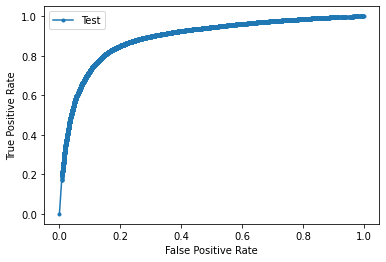

In [261]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

y_true = np.array(df_test['target'].astype(int))

# predicted1 = pd.DataFrame(predicted, columns = ['target']).astype(int)
print(y_predicted.shape, y_true.shape)
y_predicted = np.array(lr_probs) #predicted1['target'])
print(y_predicted.shape, y_true.shape)
fpr, tpr, thrhld = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [277]:
for i in lr_probs.argsort()[-15:][::-1]:# 15 most negative
    count_idx = 25000 + i
    print(df_train_test['text'][count_idx], '\n')

for i in lr_probs.argsort()[:15]: # 15 most positive
    count_idx = 25000 + i
    print(df_train_test['text'][count_idx], '\n')

Even if I had not read Anne Rice's "Queen of the Damned" from the "Vampire Chronicles," I probably would still have thought this movie was just awful.<br /><br />It was tasteless, plot-less, it made absolutely no sense at all. I sat for a while pondering the plot disassociated from the book, and the longer I thought of it, the worse it was. To associate it in any way with the prior Chronicles film is ridiculous as it is ridiculously inconsistent with that movie, let alone the book. The bare few ideas taken from Rice's genius in "The Vampire Chronicles" were butchered and ridiculed.<br /><br />It is an absolute insult to Anne Rice fans everywhere and such a pathetic excuse for a legacy in being Aaliyah's last film. Truly, it's an insult to Aaliyah fans as well.<br /><br />Possibly the only compliment can be paid to the sound effects as well as some of the graphics. Good as they may be, it is still not at all enough to make me regret the time spent watching this movie. As a matter of fac

In [310]:
def make_ftp(y_true, y_pred):
    tp, fp, tn, fn = 0, 0, 0, 0
    for ind, i in enumerate(y_true):
        if y_pred[ind] == '1':
            if y_pred[ind] == str(i):
                tn += 1
            else:
                fp += 1
        else:
            if y_pred[ind] == str(i):
                tp += 1
            else:
                fn += 1
    return tp, fp, tn, fn
                
            
#     print(y_true.shape, y_pred.shape)
tp, fp, tn, fn = make_ftp(df_test['target'], predicted)
tp, fp, tn, fn

(9359, 3141, 10987, 1513)

In [323]:
def make_accuracy(tp, fp, tn, fn):
    acc = (tp+tn)/(tp+tn+fp+fn)
    return acc
print(make_accuracy(tp, fp, tn, fn))
acc = accuracy_score(df_test['target'], predicted)
print(acc)

0.81384
0.81384


In [322]:
def make_precision_recall(tp, fp, tn, fn):
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    return precision, recall

print(make_precision_recall(tp, fp, tn, fn))
p = precision_score(df_test['target'], predicted, pos_label = '0')
r = recall_score(df_test['target'], predicted, pos_label = '0')
print(r, p)

(0.74872, 0.8608351729212657)
0.74872 0.8608351729212657


In [317]:
def f1(tp, fp, tn, fn):
    f1 = tp/(tp+0.5*(fp+fn))
    return f1
print(f1(tp, fp, tn, fn))
micro_f1 = f1_score(df_test['target'], predicted, pos_label = '0')
print(micro_f1)

0.8008728392948827
0.8008728392948828
